In [1]:
# 1.

In [2]:
# 2.

In [3]:
# 3. Classical perceptron uses the step activation function, which is prone to problems for nonlinear dataset
# Change the function to sigmoid or softmax to make it equivalent to logistic regression

In [4]:
# 4. It has non zero gradients, which allow for training

In [5]:
# 5. Sigmoid, tanh, relu
# No

In [6]:
# 6. 
# a. 10 * batch_size
# b. 10x50, 3
# c. 50x3, 3
# d. 3
# e. Y = relu((relu(X*Wh + bh))*Wo + bo)

In [7]:
# 7. Depends on the activation function, 1(logistic) or 2(softmax). 
# For MNIST, 10 outputs of softmax
# For housing prices, 1 output without activation function

In [8]:
# 8. Backprop: computes gradients of all paramteres for each cost and updates using gradient descent
# reverse-mode autodiff: the part that computes the gradients

In [9]:
# 9. Learning rate, number of neurons, number of layers, activation function
# If overfit, reduce the number of layers or neurons

In [1]:
# 10. Deep MLP in MNIST
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [10]:
keras.__version__

'2.2.4-tf'

In [2]:
# Import MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
X_valid, X_train = X_train_full[:10000], X_train_full[50000:]
y_valid, y_train = y_train_full[:10000], y_train_full[50000:]

In [4]:
# Scaling
X_valid = X_valid/255
X_train = X_train/255
X_test = X_test/255

In [61]:
# Model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

del model

model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=0.0005, momentum=0.9, nesterov=True),
             metrics=['accuracy'])

In [7]:
model.save('c10exercise.h5')

In [63]:
# Training - checkpoint at best validation error and early stopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

n_epochs = 200
checkpoint_cb = ModelCheckpoint('c10exercise.h5', save_best_only=True)
early_cb = EarlyStopping(patience=30, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_cb])

Train on 10000 samples, validate on 10000 samples
Epoch 1/200
10000/10000 [==============================] - 2s 176us/sample - loss: 1.7792 - accuracy: 0.5489 - val_loss: 1.2404 - val_accuracy: 0.7536
Epoch 2/200
10000/10000 [==============================] - 1s 143us/sample - loss: 0.9078 - accuracy: 0.8189 - val_loss: 0.7354 - val_accuracy: 0.8230
Epoch 3/200
10000/10000 [==============================] - 1s 141us/sample - loss: 0.5950 - accuracy: 0.8610 - val_loss: 0.5669 - val_accuracy: 0.8515
Epoch 4/200
10000/10000 [==============================] - 1s 145us/sample - loss: 0.4750 - accuracy: 0.8785 - val_loss: 0.4861 - val_accuracy: 0.8677
Epoch 5/200
10000/10000 [==============================] - 1s 140us/sample - loss: 0.4129 - accuracy: 0.8917 - val_loss: 0.4407 - val_accuracy: 0.8774
Epoch 6/200
10000/10000 [==============================] - 1s 141us/sample - loss: 0.3738 - accuracy: 0.8990 - val_loss: 0.4075 - val_accuracy: 0.8867
Epoch 7/200
10000/10000 [===================

10000/10000 [==============================] - 2s 199us/sample - loss: 0.1027 - accuracy: 0.9758 - val_loss: 0.2077 - val_accuracy: 0.9401
Epoch 55/200
10000/10000 [==============================] - 2s 193us/sample - loss: 0.1005 - accuracy: 0.9757 - val_loss: 0.2086 - val_accuracy: 0.9390
Epoch 56/200
10000/10000 [==============================] - 2s 200us/sample - loss: 0.0988 - accuracy: 0.9762 - val_loss: 0.2070 - val_accuracy: 0.9398
Epoch 57/200
10000/10000 [==============================] - 2s 197us/sample - loss: 0.0968 - accuracy: 0.9765 - val_loss: 0.2049 - val_accuracy: 0.9397
Epoch 58/200
10000/10000 [==============================] - 2s 192us/sample - loss: 0.0949 - accuracy: 0.9782 - val_loss: 0.2049 - val_accuracy: 0.9407
Epoch 59/200
10000/10000 [==============================] - 2s 200us/sample - loss: 0.0932 - accuracy: 0.9789 - val_loss: 0.2053 - val_accuracy: 0.9395
Epoch 60/200
10000/10000 [==============================] - 2s 197us/sample - loss: 0.0912 - accuracy

Epoch 108/200
10000/10000 [==============================] - 2s 184us/sample - loss: 0.0367 - accuracy: 0.9945 - val_loss: 0.1808 - val_accuracy: 0.9490
Epoch 109/200
10000/10000 [==============================] - 2s 179us/sample - loss: 0.0360 - accuracy: 0.9951 - val_loss: 0.1817 - val_accuracy: 0.9479
Epoch 110/200
10000/10000 [==============================] - 2s 175us/sample - loss: 0.0354 - accuracy: 0.9948 - val_loss: 0.1815 - val_accuracy: 0.9480
Epoch 111/200
10000/10000 [==============================] - 2s 179us/sample - loss: 0.0347 - accuracy: 0.9952 - val_loss: 0.1811 - val_accuracy: 0.9489
Epoch 112/200
10000/10000 [==============================] - 2s 173us/sample - loss: 0.0342 - accuracy: 0.9956 - val_loss: 0.1799 - val_accuracy: 0.9490
Epoch 113/200
10000/10000 [==============================] - 2s 170us/sample - loss: 0.0335 - accuracy: 0.9954 - val_loss: 0.1809 - val_accuracy: 0.9479
Epoch 114/200
10000/10000 [==============================] - 2s 171us/sample - los

10000/10000 [==============================] - 1s 140us/sample - loss: 0.0157 - accuracy: 0.9994 - val_loss: 0.1815 - val_accuracy: 0.9508
Epoch 162/200
10000/10000 [==============================] - 1s 138us/sample - loss: 0.0155 - accuracy: 0.9994 - val_loss: 0.1817 - val_accuracy: 0.9508
Epoch 163/200
10000/10000 [==============================] - 1s 137us/sample - loss: 0.0153 - accuracy: 0.9995 - val_loss: 0.1823 - val_accuracy: 0.9506
Epoch 164/200
10000/10000 [==============================] - 1s 140us/sample - loss: 0.0152 - accuracy: 0.9993 - val_loss: 0.1813 - val_accuracy: 0.9514
Epoch 165/200
10000/10000 [==============================] - 1s 137us/sample - loss: 0.0149 - accuracy: 0.9995 - val_loss: 0.1821 - val_accuracy: 0.9509
Epoch 166/200
10000/10000 [==============================] - 1s 135us/sample - loss: 0.0147 - accuracy: 0.9993 - val_loss: 0.1824 - val_accuracy: 0.9509


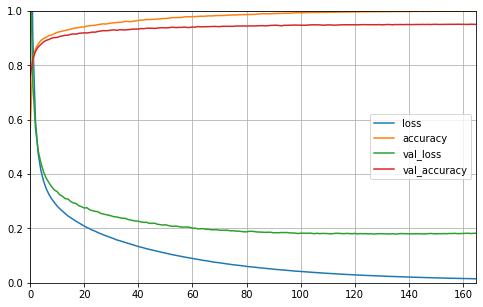

In [64]:
# Training plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [65]:
y_pred = model.predict_classes(X_test)

In [66]:
from sklearn.metrics import precision_score

precision_score(y_pred, y_test, average='macro')

0.9498484790204943